In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium as 


cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

ModuleNotFoundError: No module named 'folium'

In [4]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
1322,1425,139,Fitchburg Line,1425-fitchburg-line,#000000,539,3.0
179,263,106,Linha 3 • Vermelha (CMSP),263-linha-3---vermelha,#ef2c30,94,4.0
72,181,15,Line 10,181-line-10,#0092c7,258,NaN
998,857,111,T5,857-t5,#b5297a,97,3.0
203,356,95,M 4,356-ligne-4,#ba4a9a,83,4.0
1086,1118,114,Ogose Line,1118-ogose-line,#000099,311,4.0
636,724,77,86,724-86,#000,354,5.0
966,84,14,L2,84-l2,#992f9c,247,NaN
840,943,82,28,943-28,#e2a426,380,NaN
1255,1351,124,Lecheros,1351-lecheros,#4a90e2,493,7.0


In [5]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
5781,5928,5219,443,114,2017-11-21 00:00:00,2017-11-21 00:00:00
8242,15974,15664,1344,91,2018-11-13 22:07:19.515521,2018-11-13 22:07:19.515521
737,801,8824,645,1,2017-11-21 00:00:00,2017-11-21 00:00:00
13582,6415,5298,428,114,2017-11-21 00:00:00,2017-11-21 00:00:00
6944,8804,6359,549,147,2017-12-03 13:47:03.303722,2017-12-03 13:47:03.303722
6209,14126,13862,1273,206,2018-10-01 16:47:37.969386,2018-10-01 16:47:37.969386
1930,2035,7427,316,265,2017-11-21 00:00:00,2017-11-21 00:00:00
4037,4147,2088,205,69,2017-11-21 00:00:00,2017-11-21 00:00:00
7345,9233,9580,861,111,2017-12-13 20:46:46.390761,2017-12-13 20:46:46.390761
7049,9828,10121,940,82,2018-01-28 17:03:14.177858,2018-01-28 17:03:14.177858


In [105]:
stations = pd.read_csv('../data/stations.csv')
stations[stations['name'] == "Pico"]

,id,name,geometry,buildstart,opening,closure,city_id
476,8567,Pico,POINT(-118.2662644 34.0406307),0.0,0.0,999999.0,189
870,8568,Pico,POINT(-118.2660609 34.0407563),0.0,0.0,999999.0,189
12246,12132,Pico,POINT(-58.4741980951992 -34.5410318797355),2014.0,2015.0,999999.0,1


In [7]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [8]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [9]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


<BarContainer object of 5 artists>

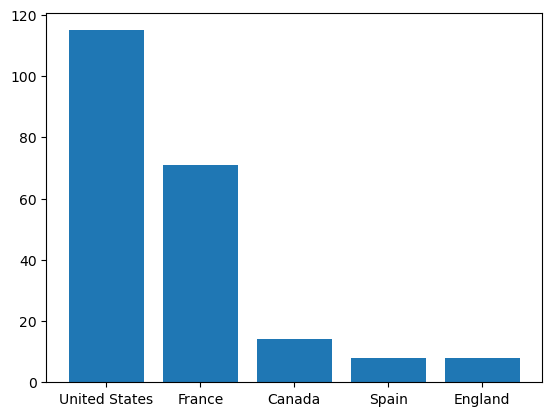

In [10]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)



<BarContainer object of 7 artists>

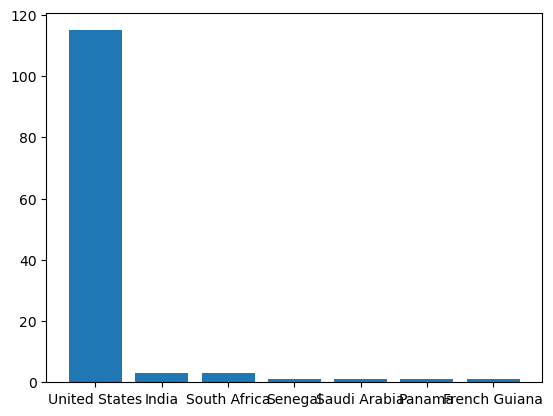

In [11]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()

ax.bar(countries, values)




In [12]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.


In [93]:
merged_cities_stations = pd.merge(stations, cities, on='city_id', how='left')
merged_cities_stations_us = merged_cities_stations[merged_cities_stations['country'] == 'United States']
merged_cities_stations_us.sample(10)

,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
13766,14208,28th Street,POINT(-73.9906602424281 40.7459413339109),1908.0,1908.0,1939.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13715,14154,181st Street,POINT(-73.9376303550991 40.8527517453232),1932.0,1932.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13690,14106,Bay Parkway,POINT(-73.9752699483617 40.6208619926574),1919.0,1919.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10201,12804,58th Street Terminal,POINT(-73.976670593003 40.7649662803463),1881.0,1881.0,1924.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14126,14644,Tarrytown,POINT(-73.8649064839577 41.0762106823165),1890.0,1890.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13568,13997,Winthrop Street,POINT(-73.9502128954369 40.6570981993083),1920.0,1920.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10389,12883,Morris Park,POINT(-73.8601197952756 40.8546929000901),1912.0,1912.0,1937.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10567,12881,East 180th Street,POINT(-73.8731501427112 40.8416004577707),1912.0,1912.0,1937.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14308,14886,Maverick,POINT(-71.0395524386134 42.3691229021805),1904.0,1904.0,999999.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
13539,13974,33rd Street,POINT(-73.9818756216018 40.7464098151293),1904.0,1904.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.


<BarContainer object of 7 artists>

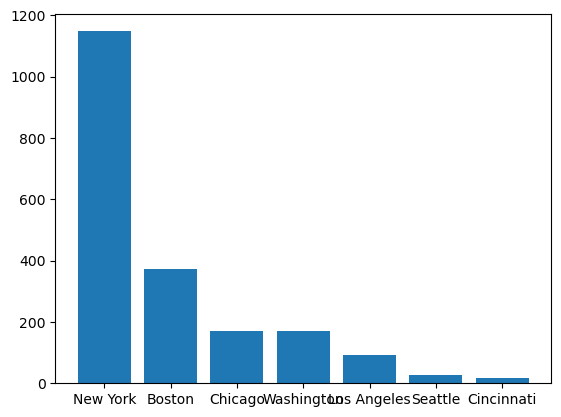

In [39]:
merged_stations_us_by_state = merged_cities_stations_us.value_counts('name_y')
merged_stations_us_by_state

fig, ax = plt.subplots()

ax.bar(merged_stations_us_by_state.index, merged_stations_us_by_state.values)

In [40]:
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


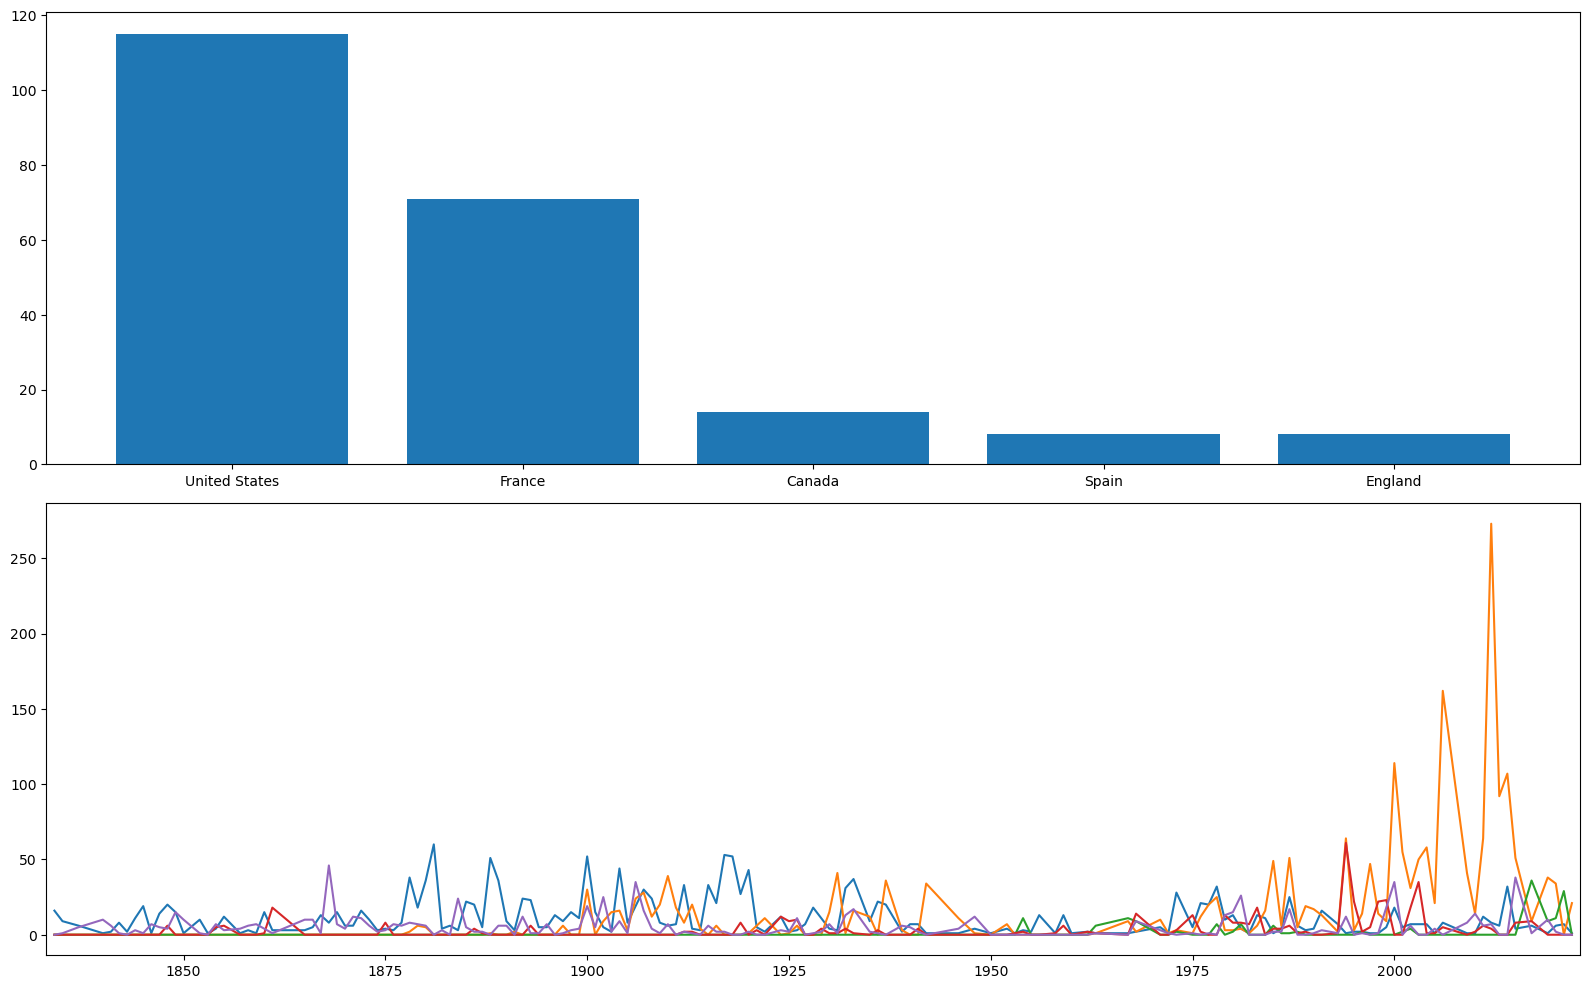

In [89]:
merged_cities_stations.sample(10)

def openings_years_per_country(df, country1, country2, country3, country4, country5):
    openings_per_country_df = pd.DataFrame()
    openings_per_country_df[country1] = df[(df['country'] == country1) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country2] = df[(df['country'] == country2) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country3] = df[(df['country'] == country3) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country4] = df[(df['country'] == country4) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country5] = df[(df['country'] == country5) & (df['opening'] > 0)].value_counts('opening')

    openings_per_country_df[[country1, country2, country3, country4, country5]] = \
        openings_per_country_df[[country1, country2, country3, country4, country5]].fillna(0)

    return openings_per_country_df.sort_index()


openings_per_country_df = openings_years_per_country(merged_cities_stations, 'United States', "France", 'Canada', 'Spain', 'England')

fig, axs = plt.subplots(2,1)

axs[1].plot(openings_per_country_df)
axs[1].set_xlim(1833, 2023)
# axs[1].legend()
axs[0].bar(top_five_countries.index, top_five_countries.values)
fig.set_size_inches(16, 10)
fig.tight_layout()



In [106]:
us_station_map = merged_cities_stations_us[['name_x', 'geometry', 'name_y']]
us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
us_station_map['long'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[0])
us_station_map



/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_97017/33158620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_97017/33158620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_97017/33158620.py:4: SettingWithCopyWarning: 
A value is t

,station,geometry,city,lat,long
351,Sands Street,POINT(-73.9900595885681 40.6999957881726),New York,40.6999957881726,-73.9900595885681
460,Sands Street,POINT(-73.9909195185139 40.7000028855033),New York,40.7000028855033,-73.9909195185139
461,7th Street/Metro Center,POINT(-118.2586637 34.0486686),Los Angeles,34.0486686,-118.2586637
476,Pico,POINT(-118.2662644 34.0406307),Los Angeles,34.0406307,-118.2662644
524,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),New York,40.6809373893361,-73.9558290151206
...,...,...,...,...,...
15448,West Edge,POINT(-122.336763227539 47.6058839076996),Seattle,47.6058839076996,-122.336763227539
15449,South Lake Union-Seattle Center,POINT(-122.343234884068 47.6203175414603),Seattle,47.6203175414603,-122.343234884068
15503,Friendship Heights,POINT(-77.0854410365934 38.9615399698817),Washington,38.9615399698817,-77.0854410365934
15504,Wisconsin Ave @ Jenifer,POINT(-77.0848162794167 38.9591131645103),Washington,38.9591131645103,-77.0848162794167
